Задача 1. Вводное задание.

Вектора х1 и у1 из архива дают значения некоторой функции 
 Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d) Аппроксимацию полиномами, используя функции np. polyfit и np.polyval.

Чтобы прочитать из архива данные, используйте следующий код:

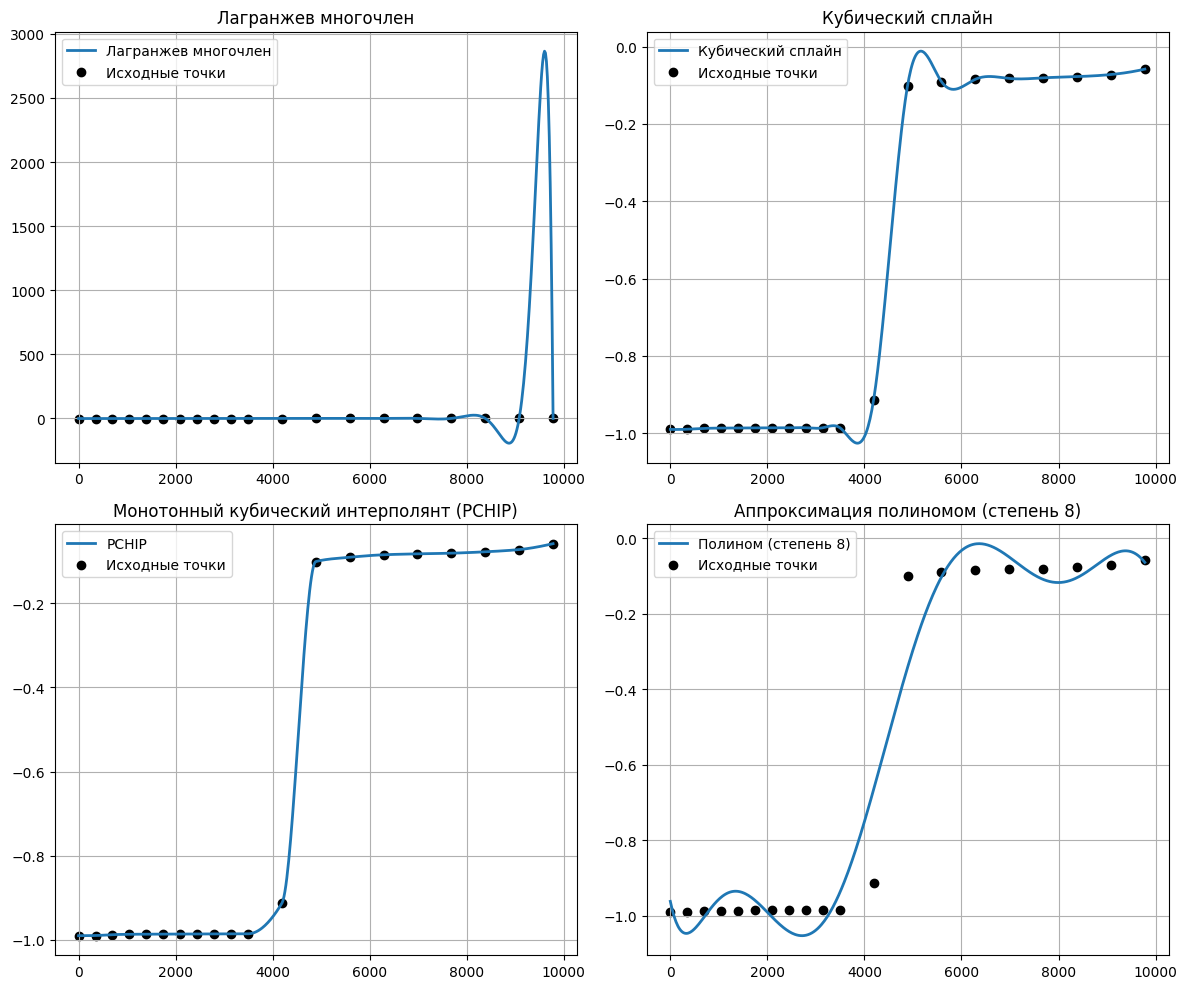

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator


with np.load('data_interp.npz') as data:
    x1, y1 = data['x1'], data['y1']


x_dense = np.linspace(np.min(x1), np.max(x1), 500)

# (a) Лагранжев многочлен
lagrange_poly = lagrange(x1, y1)
y_lagrange = lagrange_poly(x_dense)

# (b) Кубический сплайн
cs = CubicSpline(x1, y1)
y_cs = cs(x_dense)

# (c) Монотонный кубический интерполянт (PCHIP)
pchip = PchipInterpolator(x1, y1)
y_pchip = pchip(x_dense)

# (d) Аппроксимация полиномом с использованием np.polyfit и np.polyval
degree = 8
coeffs = np.polyfit(x1, y1, degree)
y_polyfit = np.polyval(coeffs, x_dense)

# Создаём подграфики 2x2 для каждого метода
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
ax = axes.flatten()

# Лагранжев многочлен
ax[0].plot(x_dense, y_lagrange, label='Лагранжев многочлен', linewidth=2)
ax[0].scatter(x1, y1, color='black', label='Исходные точки')
ax[0].set_title('Лагранжев многочлен')
ax[0].legend()
ax[0].grid(True)

# Кубический сплайн
ax[1].plot(x_dense, y_cs, label='Кубический сплайн', linewidth=2)
ax[1].scatter(x1, y1, color='black', label='Исходные точки')
ax[1].set_title('Кубический сплайн')
ax[1].legend()
ax[1].grid(True)

# Монотонный кубический интерполянт (PCHIP)
ax[2].plot(x_dense, y_pchip, label='PCHIP', linewidth=2)
ax[2].scatter(x1, y1, color='black', label='Исходные точки')
ax[2].set_title('Монотонный кубический интерполянт (PCHIP)')
ax[2].legend()
ax[2].grid(True)

# Полином
ax[3].plot(x_dense, y_polyfit, label=f'Полином (степень {degree})', linewidth=2)
ax[3].scatter(x1, y1, color='black', label='Исходные точки')
ax[3].set_title(f'Аппроксимация полиномом (степень {degree})')
ax[3].legend()
ax[3].grid(True)

plt.tight_layout()
plt.show()

# Задача 2
Допишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как xk и yk.

In [12]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        assert len(self.xk) == len(self.yk)
        f = 0
        for i in range(len(self.yk)):
            term = self.yk[i]
            for j in range(len(self.xk)):
                if(i!=j):
                    term = term*(x-self.xk[j])/(self.xk[i]-self.xk[j])
            f = f + term
        return f
        raise NotImplementedError()

In [13]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

# Задача 3. Феномен Рунге

Рассмотрим функцию Рунге, 
. Интерполируйте эту функцию на интервале [-2, 2]
, используя полином Лагранжа с m = 3,5,7,11
. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике.

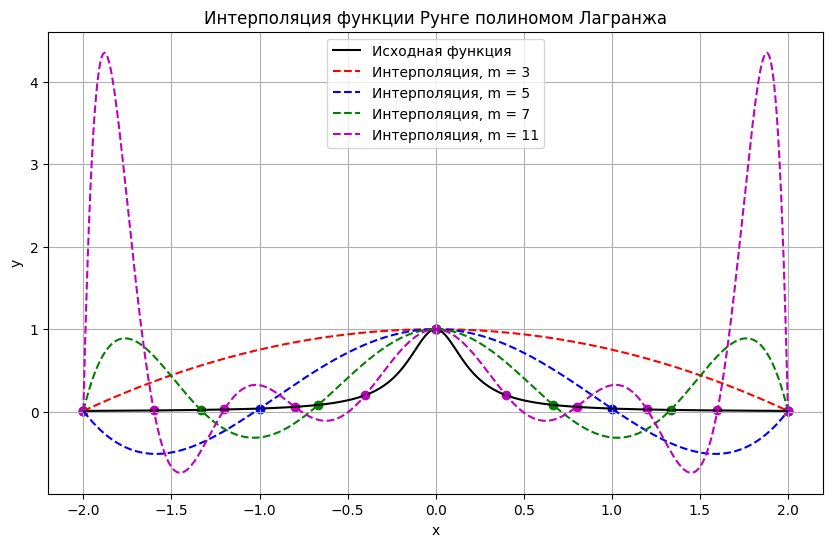

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


def runge(x):
    return 1 / (1 + 25 * x**2)


x_dense = np.linspace(-2, 2, 500)
y_runge = runge(x_dense)


m_values = [3, 5, 7, 11]

plt.figure(figsize=(10, 6))

plt.plot(x_dense, y_runge, 'k-', label='Исходная функция')


colors = ['r', 'b', 'g', 'm']

for i, m in enumerate(m_values):
    
    x_nodes = np.linspace(-2, 2, m)
    y_nodes = runge(x_nodes)
    
    # Интерполяционный полином Лагранжа
    poly = lagrange(x_nodes, y_nodes)
    y_interp = poly(x_dense)
    
    # Рисуем интерполированную функцию и узлы
    plt.plot(x_dense, y_interp, linestyle='--', color=colors[i],
             label=f'Интерполяция, m = {m}')
    plt.scatter(x_nodes, y_nodes, color=colors[i])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция функции Рунге полиномом Лагранжа')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Допишите функцию, которая возвращает узлы Чебышева.



def cheb_nodes(n, a=-1, b=1):
    #Chebyshev nodes of degree $n$ on $[a, b]$
    
    # Узлы Чебышева на [-1, 1]
    i = np.arange(1, n + 1)
    nodes = np.cos((2 * i - 1) * np.pi / (2 * n))
    
    # Преобразование узлов с интервала [-1,1] на [a, b]
    nodes = 0.5 * (a + b) + 0.5 * (b - a) * nodes
    
    return np.sort(nodes)


nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

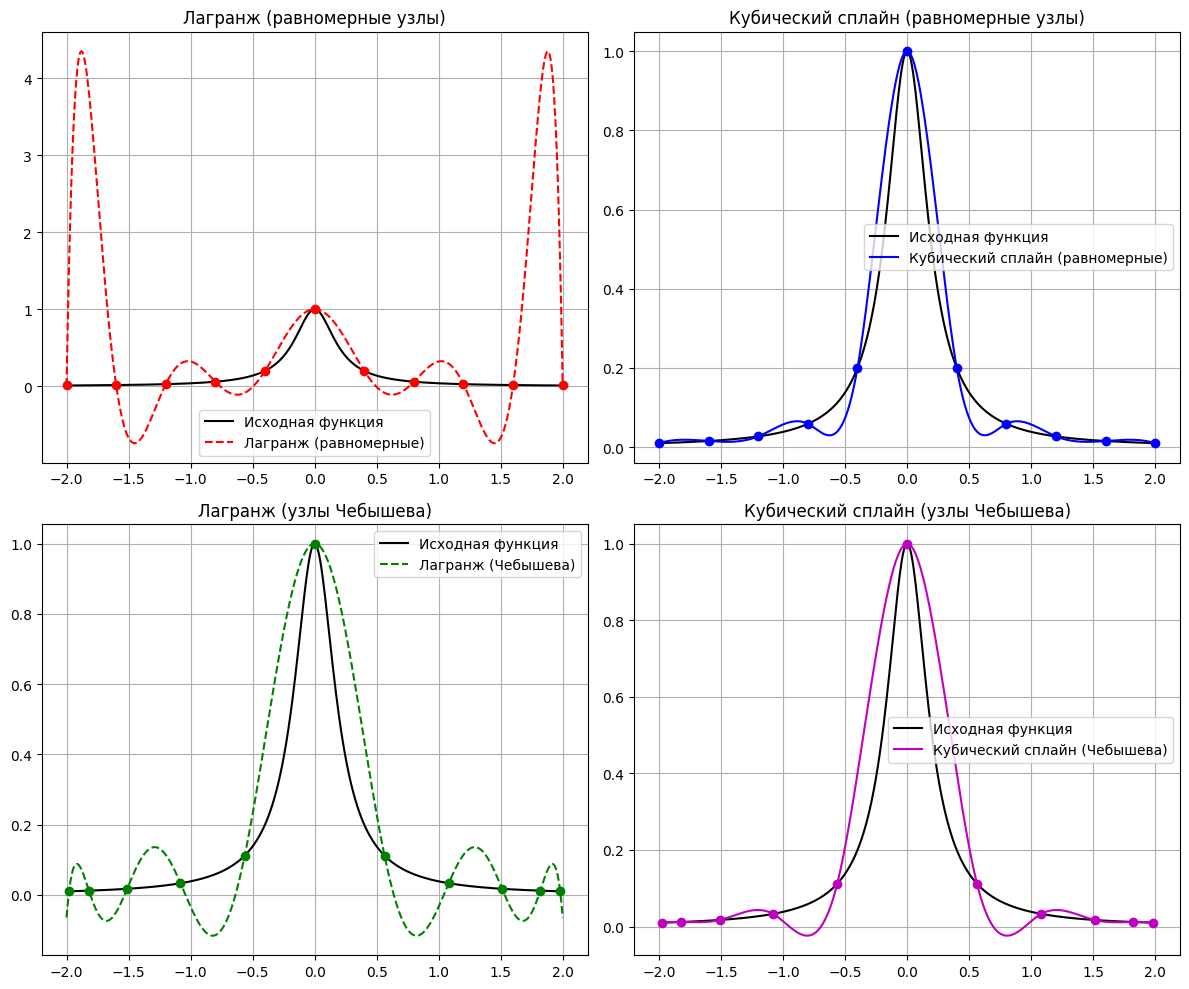

In [17]:

from scipy.interpolate import lagrange, CubicSpline


# Задаем количество узлов
m = 11

# Плотная сетка для построения кривых
x_dense = np.linspace(-2, 2, 500)
y_runge_dense = runge(x_dense)

# --- Равномерные узлы ---
x_uniform = np.linspace(-2, 2, m)
y_uniform = runge(x_uniform)

# Лагранжев интерполянт для равномерной сетки
lagrange_uniform = lagrange(x_uniform, y_uniform)
y_lagrange_uniform = lagrange_uniform(x_dense)

# Кубический сплайн для равномерной сетки
cs_uniform = CubicSpline(x_uniform, y_uniform)
y_cs_uniform = cs_uniform(x_dense)

# --- Узлы Чебышева ---
x_cheb = cheb_nodes(m, a=-2, b=2)
y_cheb = runge(x_cheb)

# Лагранжев интерполянт для узлов Чебышева
lagrange_cheb = lagrange(x_cheb, y_cheb)
y_lagrange_cheb = lagrange_cheb(x_dense)

# Кубический сплайн для узлов Чебышева
cs_cheb = CubicSpline(x_cheb, y_cheb)
y_cs_cheb = cs_cheb(x_dense)

# Построение графиков
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# 1. Лагранж с равномерными узлами
axes[0].plot(x_dense, y_runge_dense, 'k-', label="Исходная функция")
axes[0].plot(x_dense, y_lagrange_uniform, 'r--', label="Лагранж (равномерные)")
axes[0].scatter(x_uniform, y_uniform, color='r', zorder=5)
axes[0].set_title("Лагранж (равномерные узлы)")
axes[0].legend()
axes[0].grid(True)

# 2. Кубический сплайн с равномерными узлами
axes[1].plot(x_dense, y_runge_dense, 'k-', label="Исходная функция")
axes[1].plot(x_dense, y_cs_uniform, 'b-', label="Кубический сплайн (равномерные)")
axes[1].scatter(x_uniform, y_uniform, color='b', zorder=5)
axes[1].set_title("Кубический сплайн (равномерные узлы)")
axes[1].legend()
axes[1].grid(True)

# 3. Лагранж с узлами Чебышева
axes[2].plot(x_dense, y_runge_dense, 'k-', label="Исходная функция")
axes[2].plot(x_dense, y_lagrange_cheb, 'g--', label="Лагранж (Чебышева)")
axes[2].scatter(x_cheb, y_cheb, color='g', zorder=5)
axes[2].set_title("Лагранж (узлы Чебышева)")
axes[2].legend()
axes[2].grid(True)

# 4. Кубический сплайн с узлами Чебышева
axes[3].plot(x_dense, y_runge_dense, 'k-', label="Исходная функция")
axes[3].plot(x_dense, y_cs_cheb, 'm-', label="Кубический сплайн (Чебышева)")
axes[3].scatter(x_cheb, y_cheb, color='m', zorder=5)
axes[3].set_title("Кубический сплайн (узлы Чебышева)")
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()


Интерполяция Лагранжа с равномерными узлами демонстрирует явное явление Рунге: наблюдаются сильные колебания полинома на концах интервала.

При использовании узлов Чебышева колебания существенно уменьшаются, и интерполянт становится более стабильным.

Кубический сплайн, как для равномерной сетки, так и для узлов Чебышева, не проявляет характерных для глобальной полиномиальной интерполяции колебаний, так как используется кусочная интерполяция низкой степени.

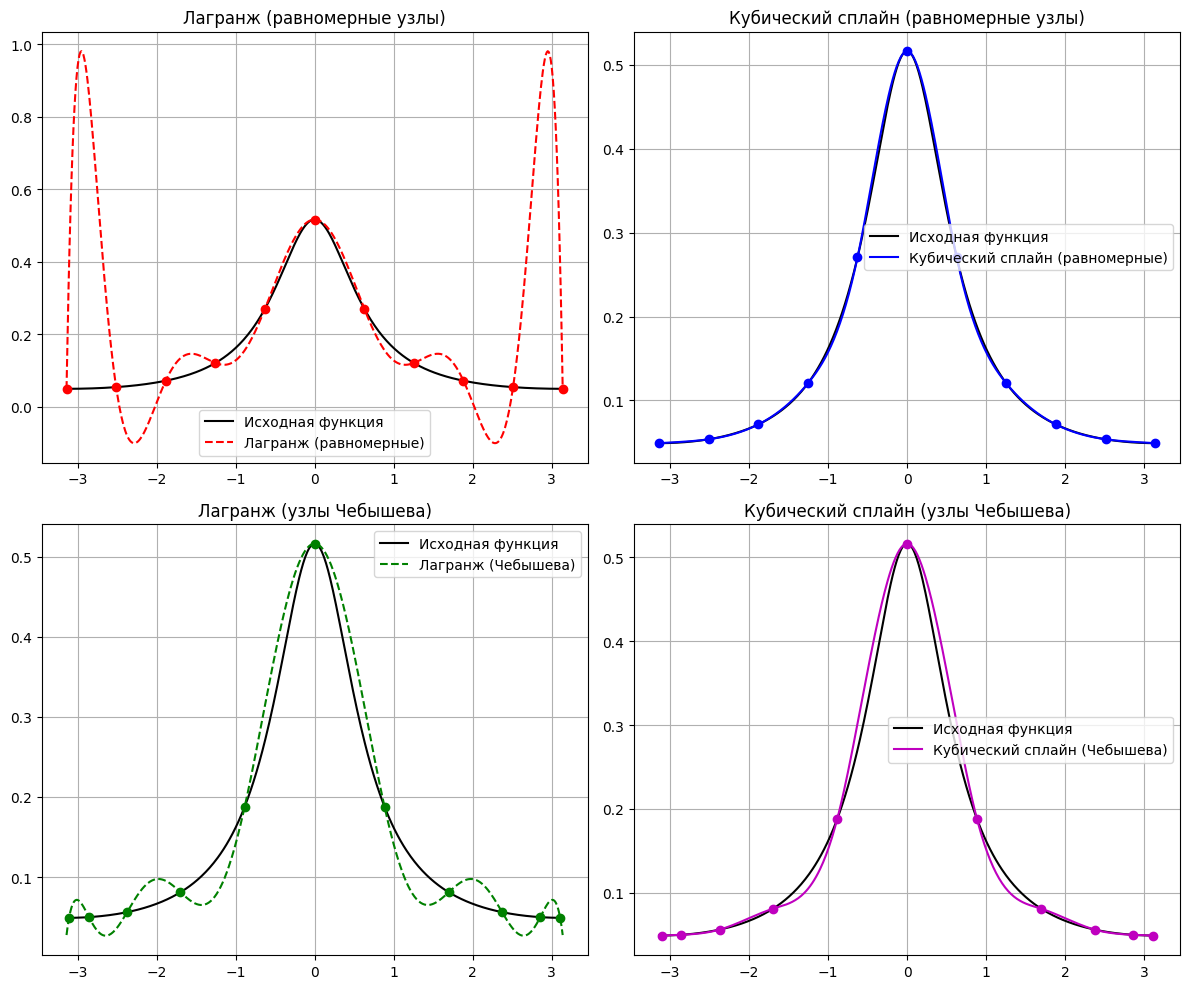

In [19]:
eps = 0.21
def u(x):
    return (eps*(eps+2))**(1/2)/(2*np.pi*(1+eps-np.cos(x)))





# Задаем количество узлов
m = 11

# Плотная сетка для построения кривых
x_dense = np.linspace(-np.pi, np.pi, 500)
y_runge_dense = u(x_dense)

# --- Равномерные узлы ---
x_uniform = np.linspace(-np.pi, np.pi, m)
y_uniform = u(x_uniform)

# Лагранжев интерполянт для равномерной сетки
lagrange_uniform = lagrange(x_uniform, y_uniform)
y_lagrange_uniform = lagrange_uniform(x_dense)

# Кубический сплайн для равномерной сетки
cs_uniform = CubicSpline(x_uniform, y_uniform)
y_cs_uniform = cs_uniform(x_dense)

# --- Узлы Чебышева ---
x_cheb = cheb_nodes(m, a=-np.pi, b=np.pi)
y_cheb = u(x_cheb)

# Лагранжев интерполянт для узлов Чебышева
lagrange_cheb = lagrange(x_cheb, y_cheb)
y_lagrange_cheb = lagrange_cheb(x_dense)

# Кубический сплайн для узлов Чебышева
cs_cheb = CubicSpline(x_cheb, y_cheb)
y_cs_cheb = cs_cheb(x_dense)

# Построение графиков
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# 1. Лагранж с равномерными узлами
axes[0].plot(x_dense, y_runge_dense, 'k-', label="Исходная функция")
axes[0].plot(x_dense, y_lagrange_uniform, 'r--', label="Лагранж (равномерные)")
axes[0].scatter(x_uniform, y_uniform, color='r', zorder=5)
axes[0].set_title("Лагранж (равномерные узлы)")
axes[0].legend()
axes[0].grid(True)

# 2. Кубический сплайн с равномерными узлами
axes[1].plot(x_dense, y_runge_dense, 'k-', label="Исходная функция")
axes[1].plot(x_dense, y_cs_uniform, 'b-', label="Кубический сплайн (равномерные)")
axes[1].scatter(x_uniform, y_uniform, color='b', zorder=5)
axes[1].set_title("Кубический сплайн (равномерные узлы)")
axes[1].legend()
axes[1].grid(True)

# 3. Лагранж с узлами Чебышева
axes[2].plot(x_dense, y_runge_dense, 'k-', label="Исходная функция")
axes[2].plot(x_dense, y_lagrange_cheb, 'g--', label="Лагранж (Чебышева)")
axes[2].scatter(x_cheb, y_cheb, color='g', zorder=5)
axes[2].set_title("Лагранж (узлы Чебышева)")
axes[2].legend()
axes[2].grid(True)

# 4. Кубический сплайн с узлами Чебышева
axes[3].plot(x_dense, y_runge_dense, 'k-', label="Исходная функция")
axes[3].plot(x_dense, y_cs_cheb, 'm-', label="Кубический сплайн (Чебышева)")
axes[3].scatter(x_cheb, y_cheb, color='m', zorder=5)
axes[3].set_title("Кубический сплайн (узлы Чебышева)")
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()


# Задача 4. UnivariateSpline.

Прочитать документацию к UnivariateSpline и определить оптимальное значение для параметра сглаживания s, учитывая, что шум был задан в виде 
. Экспериментально проверить оптимальность этого значения для какой-либо функции

Используем для сглаживания UnivariateSpline из scipy.interpolate. Согласно документации, параметр сглаживания \( s \) выбирается так, чтобы


$\sum_{i=1}^{n} \bigl(y_i - f(x_i)\bigr)^2 \le s$

При шуме с дисперсией $( \sigma^2 = 0.25 )$ ожидаемая сумма квадратов ошибок составляет примерно $(0.25\,n)$. Таким образом, оптимальное значение $s$ можно принять равным


$s_{\text{opt}} = 0.25\,n.$


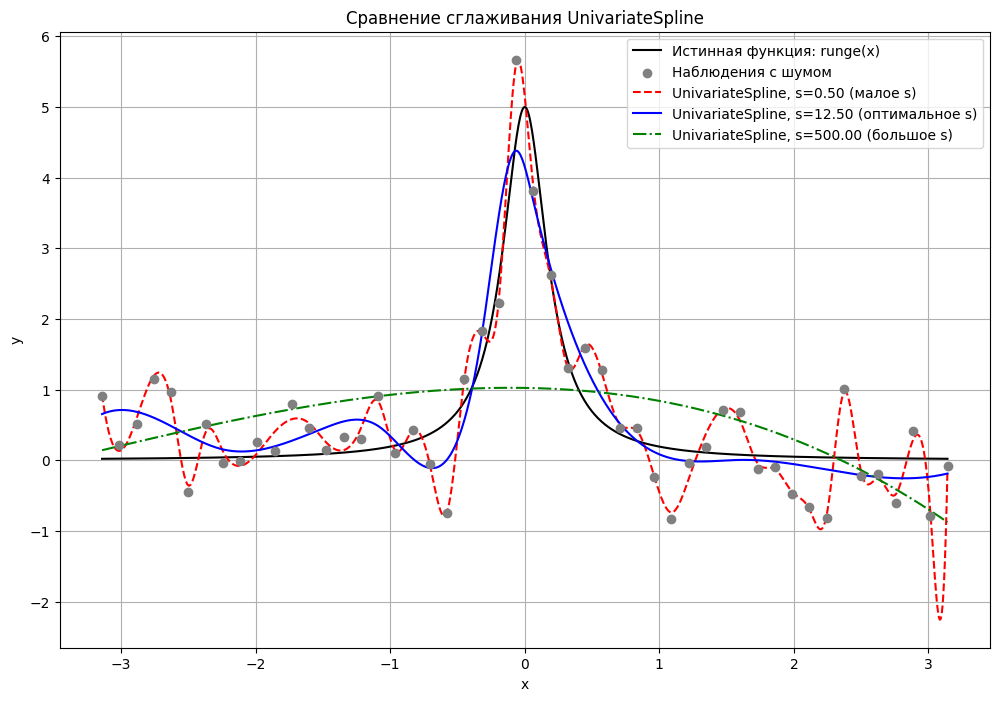

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


np.random.seed(0)


def f(x):
    return 5*runge(x)


n = 50
x = np.linspace(-np.pi, np.pi, n)


noise = 0.5 * np.random.randn(n)
y = f(x) + noise


x_dense = np.linspace(-np.pi, np.pi, 1000)
y_true = f(x_dense)

# Оптимальное значение сглаживания s
s_opt = 0.25 * n

# Для сравнения возьмём также меньшее и большее значение сглаживания
s_small = 0.01 * n    
s_large = 10 * n    

# Построение сплайнов
spline_small = UnivariateSpline(x, y, s=s_small)
spline_opt   = UnivariateSpline(x, y, s=s_opt)
spline_large = UnivariateSpline(x, y, s=s_large)

y_spline_small = spline_small(x_dense)
y_spline_opt   = spline_opt(x_dense)
y_spline_large = spline_large(x_dense)


plt.figure(figsize=(12, 8))
plt.plot(x_dense, y_true, 'k-', label="Истинная функция: runge(x)")
plt.scatter(x, y, color='gray', label="Наблюдения с шумом", zorder=5)

plt.plot(x_dense, y_spline_small, 'r--', label=f'UnivariateSpline, s={s_small:.2f} (малое s)')
plt.plot(x_dense, y_spline_opt, 'b-', label=f'UnivariateSpline, s={s_opt:.2f} (оптимальное s)')
plt.plot(x_dense, y_spline_large, 'g-.', label=f'UnivariateSpline, s={s_large:.2f} (большое s)')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Сравнение сглаживания UnivariateSpline")
plt.legend()
plt.grid(True)
plt.show()


# Задача 5. Производная и шум

Цель - найти производную следующей таблично-заданной функции с шумом. Всего есть 1000 узлов. Генерировать новые точки нельзя.

 
 
Сделайте это через конечные разности, используя минимальное даное расстояние между точками. Вспоминаем семинар 1.
Сделайте это через оптимальный шаг численного дифференциирования. То есть, при оценке производной надо брать несоседние точки исходя из погрешностей 
. Какой шаг надо брать по индексам точек?
Сделайте это через UnivariateSpline, используя метод .derivative() - он аналитически дифференциирует объект сплайна и выдаёт также объект сплайна (т.е. можем обращаться к нему как к функции). Не забывайте корректно определить параметр s.
Сравните все 3 способа численного взятия производной с аналитической производной как графически, так и используя какой-нибудь Loss.

Optimal k (индексный шаг): 9
MSE конечных разностей (соседние точки): 0.12009374932633785
MSE конечных разностей (оптимальный шаг k = 9): 0.002048900567927324
MSE производной сплайна: 0.00048423164416235584


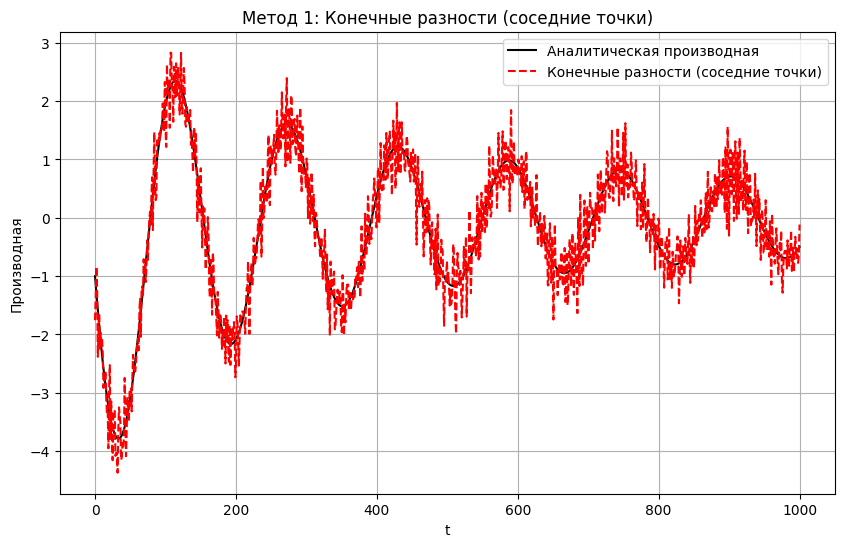

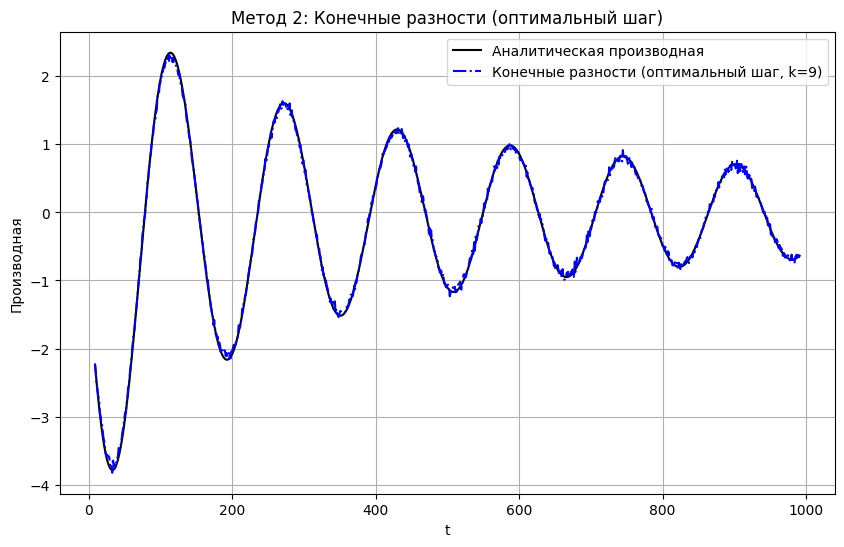

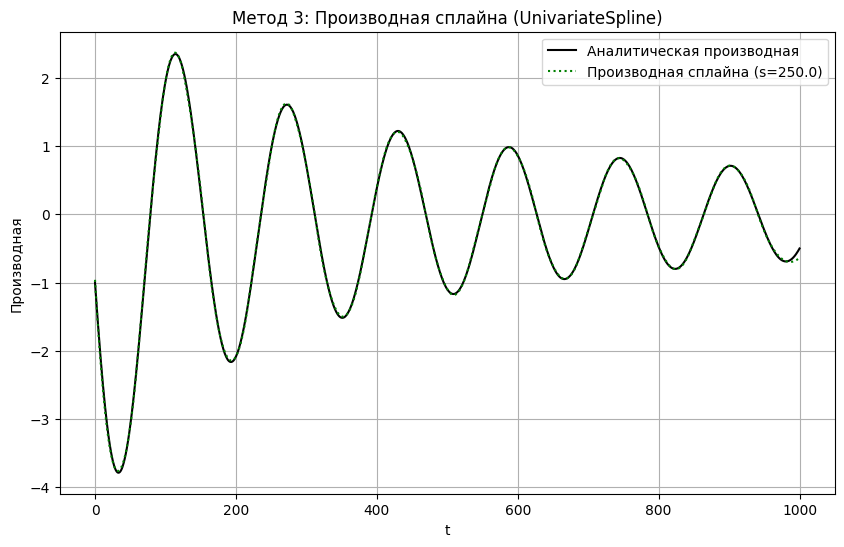

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


np.random.seed(0)


t = np.linspace(0, 1000, 1000)

u = 200 / (1 + t/200) * (0.5 + 0.5 * np.cos(0.04 * t)) + 0.5 * np.random.randn(len(t))


f_true = 100 * (1 + np.cos(0.04 * t)) / (1 + t/200)

# Аналитическая производная истинной функции:
df_true = (-4 * np.sin(0.04 * t) * (1 + t/200) - 0.5 * (1 + np.cos(0.04 * t))) / (1 + t/200)**2

# Метод 1: Конечные разности (соседние точки)

du_fd_adj = np.empty_like(u)
dt = t[1] - t[0]
du_fd_adj[0] = (u[1] - u[0]) / dt
du_fd_adj[1:-1] = (u[2:] - u[:-2]) / (t[2:] - t[:-2])
du_fd_adj[-1] = (u[-1] - u[-2]) / dt

# Метод 2: Конечные разности с оптимальным шагом

def finite_diff_with_step(u, t, k):
    
    return (u[2*k:] - u[:-2*k]) / (t[2*k:] - t[:-2*k])

# Перебор шагов k от 1 до 20 для поиска оптимального (минимизирующего MSE)
ks = np.arange(1, 21)
errors = []
for k in ks:
    du_est = finite_diff_with_step(u, t, k)
    mse = np.mean((du_est - df_true[k:-k])**2)
    errors.append(mse)
optimal_k = ks[np.argmin(errors)]
print("Optimal k (индексный шаг):", optimal_k)

# Вычисляем производную с оптимальным шагом
du_fd_opt = finite_diff_with_step(u, t, optimal_k)
t_fd_opt = t[optimal_k:-optimal_k]

# Метод 3: Производная сплайна
# Параметр сглаживания s выбирается как: s_opt = 0.25 * n, где n = 1000
s_opt = 0.25 * len(t)
spline = UnivariateSpline(t, u, s=s_opt)
spline_deriv = spline.derivative()
du_spline = spline_deriv(t)

#Сравнение методов

mse_fd_adj = np.mean((du_fd_adj - df_true)**2)
mse_fd_opt = np.mean((du_fd_opt - df_true[optimal_k:-optimal_k])**2)
mse_spline = np.mean((du_spline - df_true)**2)

print("MSE конечных разностей (соседние точки):", mse_fd_adj)
print("MSE конечных разностей (оптимальный шаг k = {}):".format(optimal_k), mse_fd_opt)
print("MSE производной сплайна:", mse_spline)

# График 1: Конечные разности (соседние точки)
plt.figure(figsize=(10, 6))
plt.plot(t, df_true, 'k-', label="Аналитическая производная")
plt.plot(t, du_fd_adj, 'r--', label="Конечные разности (соседние точки)")
plt.xlabel("t")
plt.ylabel("Производная")
plt.title("Метод 1: Конечные разности (соседние точки)")
plt.legend()
plt.grid(True)
plt.show()

# График 2: Конечные разности (оптимальный шаг)
plt.figure(figsize=(10, 6))
plt.plot(t[optimal_k:-optimal_k], df_true[optimal_k:-optimal_k], 'k-', label="Аналитическая производная")
plt.plot(t_fd_opt, du_fd_opt, 'b-.', label="Конечные разности (оптимальный шаг, k={})".format(optimal_k))
plt.xlabel("t")
plt.ylabel("Производная")
plt.title("Метод 2: Конечные разности (оптимальный шаг)")
plt.legend()
plt.grid(True)
plt.show()

# График 3: Производная сплайна
plt.figure(figsize=(10, 6))
plt.plot(t, df_true, 'k-', label="Аналитическая производная")
plt.plot(t, du_spline, 'g:', label="Производная сплайна (s={})".format(s_opt))
plt.xlabel("t")
plt.ylabel("Производная")
plt.title("Метод 3: Производная сплайна (UnivariateSpline)")
plt.legend()
plt.grid(True)
plt.show()


# Задача 6*. Аппроксимация узлов Чебышева.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке 

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной 
по формуле 
, где

 
функция, приближённо отображающая чебышевскую сетку в равномерную. Да, вам надо численно реализовать обратное отображение. В новой переменной 
, составьте интерполяционный многочлен
 Постройте график получившейся интерполяции исходной функции 
. Делает ли такая процедура явление Рунге менее выраженным?